In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import to_datetime
from fbprophet import Prophet

In [2]:
dataset=pd.read_csv(r"C:\Car sales\monthly-car-sales.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
Month    108 non-null object
Sales    108 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [4]:
dataset.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [5]:
dataset.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [6]:
dataset.isnull().any()

Month    False
Sales    False
dtype: bool

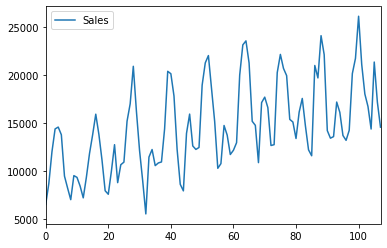

In [7]:
dataset.plot()
pyplot.show()

In [8]:
from pandas import to_datetime
dataset.columns=['ds','y']
dataset['ds']=to_datetime(dataset['ds'])

In [9]:
model=Prophet()
model.fit(dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\akhil\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
import joblib
joblib.dump(model,"sales.sav")

['sales.sav']

In [11]:
future = list()
for i in range(1,13):
    date = '1969-%02d' % i
    print(date)
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

1969-01
1969-02
1969-03
1969-04
1969-05
1969-06
1969-07
1969-08
1969-09
1969-10
1969-11
1969-12


In [12]:
forecast = model.predict(future)

In [13]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,15376.752451,13932.514874,16910.275329
1,1969-02-01,16138.731483,14400.431595,17635.121233
2,1969-03-01,21351.103785,19811.034385,22885.861405
3,1969-04-01,23479.854771,21947.473858,25005.627634
4,1969-05-01,24992.388293,23316.132890,26482.671425
5,1969-06-01,22254.527429,20656.236671,23825.930686
6,1969-07-01,17901.835593,16247.419197,19393.957222
7,1969-08-01,15730.040830,14210.670504,17310.049229
8,1969-09-01,14235.917670,12665.225005,15920.381941
9,1969-10-01,18672.473959,17114.734084,20232.680732


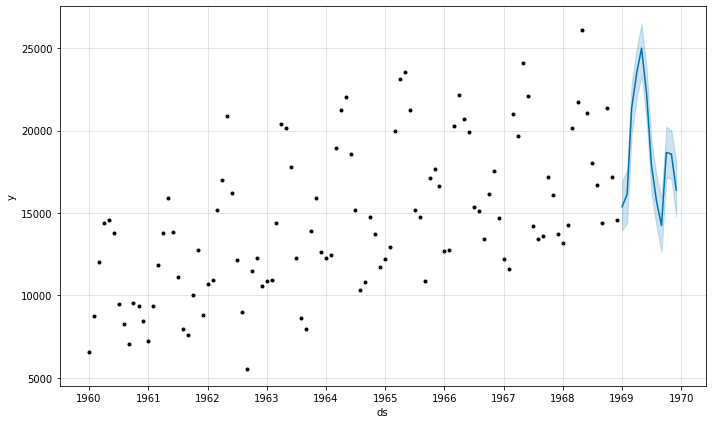

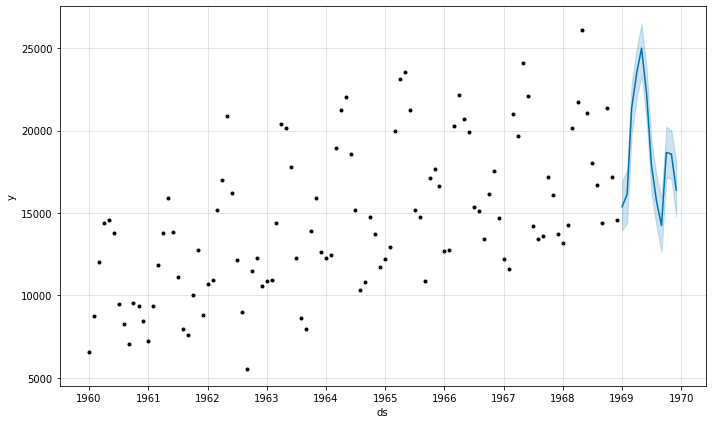

In [14]:
model.plot(forecast)